In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('Zomato-data-.csv')
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
data['rate']=data['rate'].str.split('/').str[0].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
data.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


Duplicate Removal

In [ ]:
duplicated_rows = data.duplicated()

In [ ]:
duplicated_rows.sum()

np.int64(0)

Handling missing values

In [ ]:
data.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [ ]:
num_df_cols = ['rate', 'votes', 'approx_cost(for two people)']

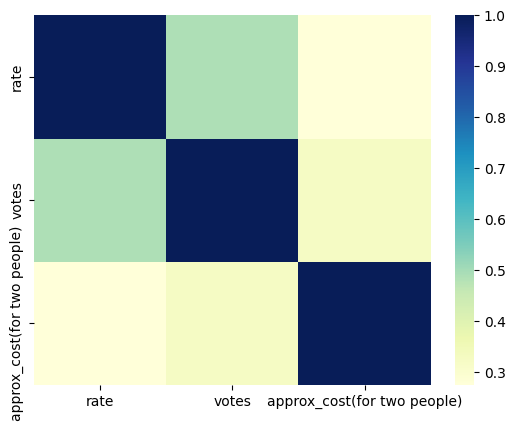

In [ ]:
sns.heatmap(data[num_df_cols].corr(), annot=False, cmap='YlGnBu')
plt.show()

Scaling numerical variables

In [ ]:
for col in num_df_cols:
    data[col] = (data[col]-data[col].min())/(data[col].max()-data[col].min())

Encoding categorical variables

In [ ]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,0.75,0.158681,0.823529,Buffet
1,Spice Elephant,Yes,No,0.75,0.161138,0.823529,Buffet
2,San Churro Cafe,Yes,No,0.60,0.187961,0.823529,Buffet
3,Addhuri Udupi Bhojana,No,No,0.55,0.018018,0.235294,Buffet
4,Grand Village,No,No,0.60,0.033989,0.588235,Buffet


In [ ]:
data['listed_in(type)'].value_counts()

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


In [ ]:
data['online_order'] = data['online_order'].map({'Yes':1, 'No':0})

In [ ]:
data['book_table'] = data['book_table'].map({'Yes':1, 'No':0})
data['listed_in(type)'] = data['listed_in(type)'].map({'Dining':1, 'Cafes':2, 'other':3, 'Buffet':4})

In [ ]:
data = data.drop('name', axis=1)

In [ ]:
data

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,1,1,0.75,0.158681,0.823529,4
1,1,0,0.75,0.161138,0.823529,4
2,1,0,0.60,0.187961,0.823529,4
3,0,0,0.55,0.018018,0.235294,4
4,0,0,0.60,0.033989,0.588235,4
...,...,...,...,...,...,...
143,0,0,0.35,0.000000,0.000000,1
144,0,0,0.35,0.000000,0.058824,1
145,1,0,0.70,0.157862,0.411765,1
146,0,0,0.20,0.020066,0.823529,1


Train Test Split for Regression

In [ ]:
y = data['listed_in(type)']
X = data.drop('listed_in(type)', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,online_order,book_table,rate,votes,approx_cost(for two people)
136,0,0,0.35,0.000000,0.058824
45,0,0,0.60,0.007371,0.352941
119,0,0,0.25,0.006143,0.941176
27,0,0,0.35,0.000819,0.470588
4,0,0,0.60,0.033989,0.588235
...,...,...,...,...,...
71,0,0,0.75,0.106470,0.235294
106,0,0,0.40,0.001638,0.235294
14,1,0,0.60,0.187961,0.823529
92,0,0,0.55,0.000000,0.117647


Build machine learning models
- Regression task

In [ ]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)

Evaluate model on test data